In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import json
import re 
import time
from pandas.io.json import json_normalize
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

In [2]:
objFt = pd.read_csv("C:/Users/Aaron/Desktop/loldfs/OBJECTIVE_TWO_game_objectives.csv")

In [3]:
objFt.info()
objFt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185846 entries, 0 to 185845
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   gameId           185846 non-null  int64 
 1   teamId           185846 non-null  int64 
 2   win              185846 non-null  object
 3   firstBlood       185846 non-null  bool  
 4   firstTower       185846 non-null  bool  
 5   firstBaron       185846 non-null  bool  
 6   firstDragon      185846 non-null  bool  
 7   firstRiftHerald  185846 non-null  bool  
 8   dragonKills      185846 non-null  int64 
 9   riftHeraldKills  185846 non-null  int64 
dtypes: bool(5), int64(4), object(1)
memory usage: 8.0+ MB


,gameId,teamId,win,firstBlood,firstTower,firstBaron,firstDragon,firstRiftHerald,dragonKills,riftHeraldKills
0,4247263043,200,Win,False,True,False,True,True,3,2
1,4247155821,100,Win,False,False,False,True,True,2,2
2,4243963257,200,Win,True,True,False,True,True,2,2
3,4241678498,200,Win,True,True,False,False,True,3,1
4,4241538868,100,Win,True,True,True,True,True,2,2


In [4]:
df = objFt.drop(["gameId", "teamId", "firstBlood", "firstDragon", "firstRiftHerald", "riftHeraldKills"], axis = 1)
df

,win,firstTower,firstBaron,dragonKills
0,Win,True,False,3
1,Win,False,False,2
2,Win,True,False,2
3,Win,True,False,3
4,Win,True,True,2
...,...,...,...,...
185841,Fail,False,False,0
185842,Fail,True,False,1
185843,Fail,False,False,0
185844,Fail,True,False,2


In [5]:
encoder = {"Win" : True, "Fail" : False}
label = df["win"]
label = label.replace(encoder)
feat = df.drop(["win"], axis = 1)

ft_train, ft_test, lb_train, lb_test = train_test_split(feat, label, test_size = 0.7, random_state = 42)

In [6]:
#
#
#
#
#

In [7]:
#DECISION TREE CLASSIFIER

start = time.time()

dt = tree.DecisionTreeClassifier()
dt.fit(ft_train, lb_train)
dtPred = dt.predict(ft_test)

end = time.time()

DTA = metrics.accuracy_score(lb_test, dtPred)
print(DTA)
print(f"Training time is {end - start} seconds")

0.8111504846532865
Training time is 0.04593515396118164 seconds


In [8]:
#
#
#
#
#

In [9]:
#NAIVE BAYES

start = time.time()

nb = GaussianNB()
nb.fit(ft_train, lb_train.values.ravel())
nbPred = nb.predict(ft_test)

end = time.time()

NBA = metrics.accuracy_score(lb_test, nbPred)
print(NBA)
print(f"Training time is {end - start} seconds")

0.7772900924723083
Training time is 0.052927255630493164 seconds


In [10]:
#
#
#
#
#

In [11]:
#RANDOM FOREST CLASSIFIER

start = time.time()

rf = RandomForestClassifier()
rf.fit(ft_train, lb_train.values.ravel())
rfPred = rf.predict(ft_test)

end = time.time()

RFA = metrics.accuracy_score(lb_test, rfPred)
print(RFA)
print(f"Training time is {end - start} seconds")

0.8111504846532865
Training time is 2.2366387844085693 seconds


Text(0.5, 1.0, 'Feature Importance - Random Forest')

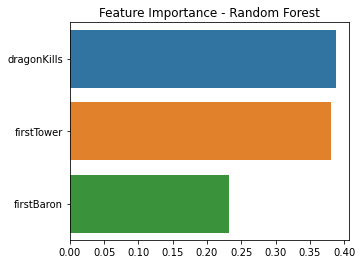

In [26]:
#feature importance
featNames = ["firstTower", "firstBaron", "dragonKills",]
feature_score = pd.Series(rf.feature_importances_, index = featNames).sort_values(ascending = False)

fig_dims = (5, 4)
fig, ax = plt.subplots(figsize = fig_dims)
sns.barplot(x = feature_score, y = feature_score.index, ax = ax)
ax.set_title("Feature Importance - Random Forest")

In [13]:
#
#
#
#
#

In [14]:
#LOGISTIC REGRESSION

start = time.time()

logReg = LogisticRegression(solver = "liblinear")
logReg.fit(ft_train, lb_train.values.ravel())
lrPred = logReg.predict(ft_test)

end = time.time()

LRA = metrics.accuracy_score(lb_test, rfPred)
print(LRA)
print(f"Training time is {end - start} seconds")

0.8111504846532865
Training time is 0.07479691505432129 seconds


Text(0.5, 257.44, 'Predicted label')

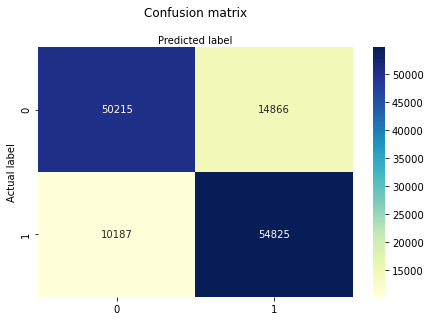

In [15]:
#confusion matrix
cnf_matrix = metrics.confusion_matrix(lb_test, lrPred)
cnf_matrix

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [16]:
#
#
#
#
#

In [17]:
#EXTREME GRADIENT BOOST
start = time.time()

xgbc = XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss')
xgbc.fit(ft_train, lb_train.values.ravel())
xgbcPred = xgbc.predict(ft_test)

end = time.time()

XGBA = metrics.accuracy_score(lb_test, xgbcPred)
print(XGBA)
print(f"Training time is {end - start} seconds")

0.8111504846532865
Training time is 1.002690076828003 seconds


Text(0.5, 1.0, 'Feature Importance - Extreme Gradient Boost')

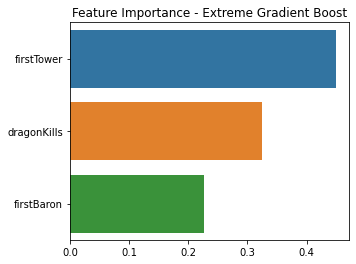

In [25]:
#XGB feature importance
feature_score = pd.Series(xgbc.feature_importances_, index = featNames).sort_values(ascending = False)

fig_dims = (5, 4)
fig, ax = plt.subplots(figsize = fig_dims)
sns.barplot(x = feature_score, y = feature_score.index, ax = ax)
ax.set_title("Feature Importance - Extreme Gradient Boost")

In [19]:
#
#
#
#
#

In [20]:
#ACCURACY OVERVIEW
DT = "{:.2f}".format(DTA*100)+"%"
NB = "{:.2f}".format(NBA*100)+"%"
RF = "{:.2f}".format(RFA*100)+"%"
LR = "{:.2f}".format(LRA*100)+"%"
XGB = "{:.2f}".format(XGBA*100)+"%"
print(DT, NB, RF, LR, XGB)

81.12% 77.73% 81.12% 81.12% 81.12%


In [21]:
#
#
#
#
#

Decision Tree: ROC AUC = 0.874
Naive Bayes: ROC AUC = 0.867
Random Forest: ROC AUC = 0.874
Logistic Regression: ROC AUC = 0.871
Extreme Gradient Boost: ROC AUC = 0.874


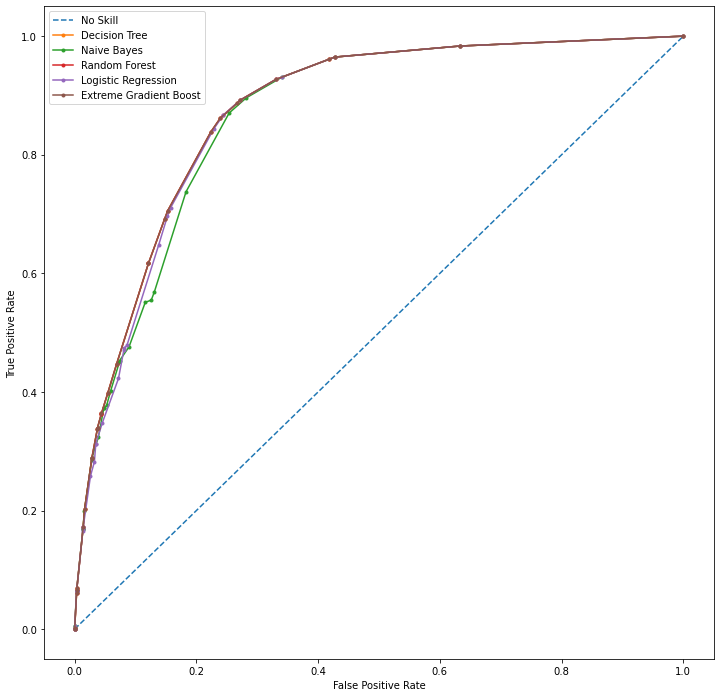

In [22]:
#ROC CURVES PLOT

#plot the no skill line
nsProbs = [0 for _ in range(len(lb_test))]
nsAuc = roc_auc_score(lb_test, nsProbs)
ns_fpr, ns_tpr, _ = roc_curve(lb_test, nsProbs)

#Decision Tree
dtProb = dt.predict_proba(ft_test)
dtProb = dtProb[:, 1]
dtAuc = roc_auc_score(lb_test, dtProb)
print("Decision Tree: ROC AUC = %.3f" % (dtAuc))
dt_fpr, dt_tpr, _ = roc_curve(lb_test, dtProb)

#Naive Bayes
nbProb = nb.predict_proba(ft_test)
nbProb = nbProb[:, 1]
nbAuc = roc_auc_score(lb_test, nbProb)
print("Naive Bayes: ROC AUC = %.3f" % (nbAuc))
nb_fpr, nb_tpr, _ = roc_curve(lb_test, nbProb)

#Random Forest
rfProb = rf.predict_proba(ft_test)
rfProb = rfProb[:, 1]
rfAuc = roc_auc_score(lb_test, rfProb)
print("Random Forest: ROC AUC = %.3f" % (rfAuc))
rf_fpr, rf_tpr, _ = roc_curve(lb_test, rfProb)

#Logistic Regression
lrProb = logReg.predict_proba(ft_test)
lrProb = lrProb[:, 1]
lrAuc = roc_auc_score(lb_test, lrProb)
print("Logistic Regression: ROC AUC = %.3f" % (lrAuc))
lr_fpr, lr_tpr, _ = roc_curve(lb_test, lrProb)

#Extreme Gradient Boost
xgbcProb = xgbc.predict_proba(ft_test)
xgbcProb = xgbcProb[:, 1]
xgbcAuc = roc_auc_score(lb_test, xgbcProb)
print("Extreme Gradient Boost: ROC AUC = %.3f" % (xgbcAuc))
xgbc_fpr, xgbc_tpr, _ = roc_curve(lb_test, xgbcProb)

plt.figure(figsize = (12, 12))

plt.plot(ns_fpr, ns_tpr, linestyle = "--", label = 'No Skill')
plt.plot(dt_fpr, dt_tpr, marker = ".", label = "Decision Tree")
plt.plot(nb_fpr, nb_tpr, marker = ".", label = "Naive Bayes")
plt.plot(rf_fpr, rf_tpr, marker = ".", label = "Random Forest")
plt.plot(lr_fpr, lr_tpr, marker = ".", label = "Logistic Regression")
plt.plot(xgbc_fpr, xgbc_tpr, marker = ".", label = "Extreme Gradient Boost")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()